In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, filters
from PIL import Image
import skimage.color
import skimage.io
import seaborn as sns
import math

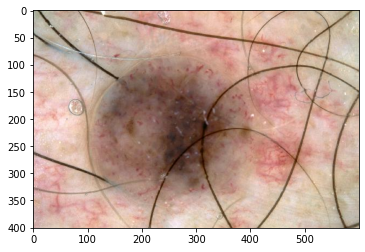

In [ ]:
im = plt.imread('resized_data/example_image_resized/ISIC_0015483.jpg')
plt.imshow(im)

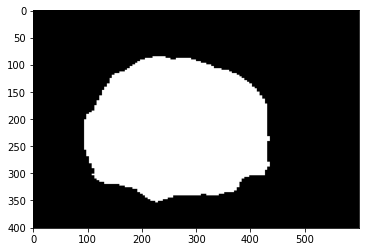

In [ ]:
border=plt.imread('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')
plt.imshow(border, cmap='gray')

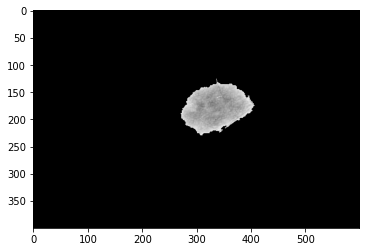

In [ ]:
#adding the border to the picture

#load the images as objects with Image.open()

borderObj = Image.open('resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png')
imObj = Image.open('resized_data/example_image_resized/ISIC_0001769.jpg')

borderObj.paste(imObj, (0,0), mask = borderObj) 

plt.imshow(borderObj, cmap='gray')

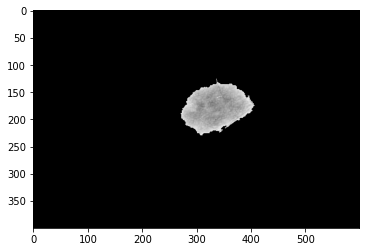

[146 135 112 ... 149 150 153]
(8513,)


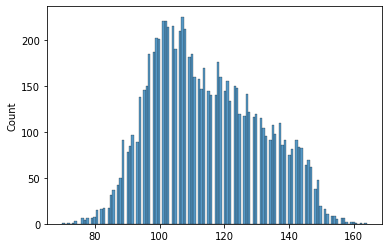

In [ ]:
#greyscale histogram, Color
#image = skimage.io.imread(fname='resized_data/example_image_resized/ISIC_0015372.jpg', as_gray=True)

#show the picture
fig, ax = plt.subplots()
plt.imshow(borderObj, cmap='gray')
plt.show()


#Create the plot with 256 bins (for each range of color)
# histogram, bin_edges = np.histogram(borderObj, bins=255, range=(1, 256))
# fig = plt.figure()
# ax = fig.add_axes((0,0,1,1))
# plt.title("Grayscale Histogram")
# plt.xlabel("grayscale value")
# plt.ylabel("pixel count")
# plt.xlim([0, 256])
# sns.lineplot(bin_edges[1:], histogram, ax=ax)  # <- or here
# plt.show()
# sns.histplot(np.array(borderObj))


# or do it with the colors

#img = im.copy()
#img[border==0] = 0
#plt.imshow(img)
border_arr = np.array(borderObj)
border_arr = border_arr[border_arr != 0]
sns.histplot(border_arr, bins=128)

print(border_arr)

print(border_arr.shape)

71601.0
69364


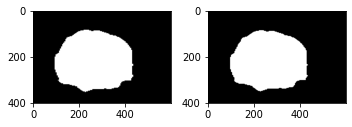

In [ ]:
from skimage import morphology

struct_el = morphology.disk(2)

# Use this "brush" to erode the image - eat away at the borders

mask_eroded = morphology.binary_erosion(border, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(border, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
new_area= np.sum(mask_eroded)
area = np.sum(border)

print(area)
print(new_area)

(400, 600)


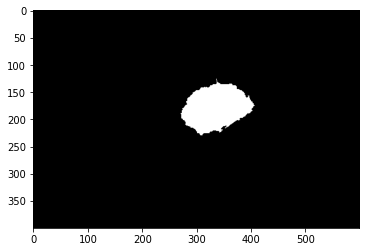

In [ ]:
from skimage import transform
img = plt.imread("resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")
img_rot = transform.rotate(img, 0)
print(img.shape)
plt.imshow(img, cmap="gray");

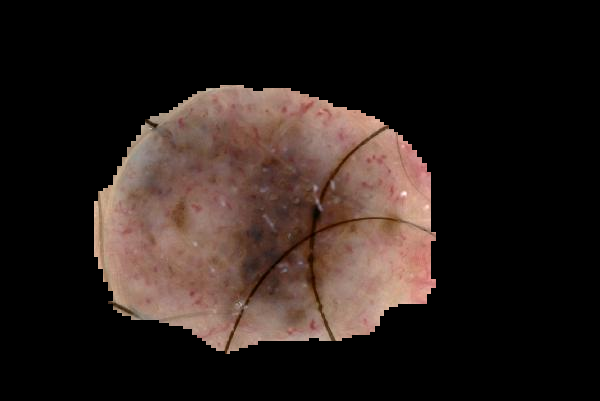

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# border = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png').convert("RGB")
# mask = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')
# img = Image.open('resized_data/example_image_resized/ISIC_0015483.jpg').convert("RGB")
# border.paste(img, mask=mask)

img = plt.imread('resized_data/example_image_resized/ISIC_0015483.jpg')
seg = plt.imread('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')

border = Image.fromarray(np.uint8(seg * 255)).convert('RGB')
image = Image.fromarray(np.uint8(img)).convert('RGB')
border.paste(image, mask=Image.fromarray(np.uint8(seg*255)))
border.show()
# image.show()


# som = np.array(border)
# print(som[200,300,:])

# segments = slic(som, n_segments = 10, sigma = 5, mask=mask)

# fig = plt.figure("Superpixels -- %d segments" % (10))
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(mark_boundaries(som, segments))
# plt.axis("off")




# #plt.show()
# avg_color = np.vstack([np.round(np.mean(som[segments==s], axis=0)) for s in np.unique(segments)])

# avg_color
# avg_color = avg_color[1:]
# np.std(avg_color, axis = 0)
# avg_color[np.where((avg_color != (0, 0, 0)).all(axis=1))]
# np.mean(np.std(avg_color, axis=0))

In [ ]:
def avg_color_dist(color_arr):
    """
    Computes the Euclidean distance between all colors in the average color array.
    takes average color array as input.
    returns average distance as float.
    """
    distances = []
    for i, color in enumerate(color_arr):
        for j in range(i+1, len(color_arr)):
            distances.append(math.dist(color_arr[i], color_arr[j]))
    return sum(distances)/len(distances) # Could also return range(min, max) if we want to use that to say something.

array([9.65068922, 9.75249256, 9.51931111])

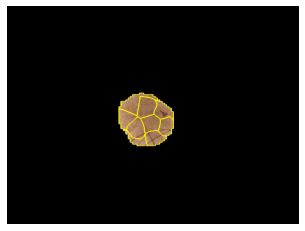

In [ ]:
border2 = Image.open('resized_data/example_segmentation_resized/ISIC_0014616_segmentation.png').convert("RGB")
mask2 = Image.open('resized_data/example_segmentation_resized/ISIC_0014616_segmentation.png')
img2 = Image.open('resized_data/example_image_resized/ISIC_0014616.jpg').convert("RGB")

border2.paste(img2, mask=mask2)
#border.show()


som2 = np.array(border2)


segments2 = slic(som2, n_segments = 10, sigma = 5, mask=mask2)

fig = plt.figure("Superpixels -- %d segments" % (10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(som2, segments2))
plt.axis("off")




#plt.show()
avg_color2 = [np.round(np.mean(som2[segments2==s], axis=0)) for s in np.unique(segments2)][1:] 
avg_color2
np.std(avg_color2, axis = 0)

In [ ]:
print(f"colorful : {avg_color},\nnot colorful: {avg_color2}")

NameError: name 'avg_color' is not defined

In [ ]:
import pandas as pd
from scripts.color_features import color_features
from os import listdir
img_path = "resized_data/example_image_resized/"
seg_path = "resized_data/example_segmentation_resized/"
img_names = sorted(listdir(img_path))
seg_names = sorted(listdir(seg_path))

df = pd.DataFrame({"img": img_names, "seg": seg_names})
results = [color_features(img_path + img, seg_path + seg) for img, seg in zip(img_names, seg_names)]
df["color_dist"], df["color_sd"] = zip(*results)
df.to_csv("color_features", index=False)

ModuleNotFoundError: No module named 'scripts'

### Asymmetry 
Alt hernede er bare test, slet når vi er færdige med assymetry. 😎

In [ ]:
from skimage import transform 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

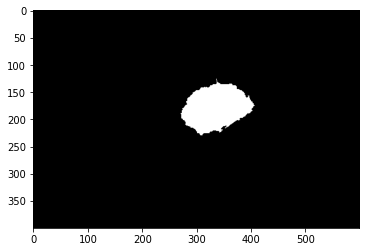

In [ ]:
# We want to rotate each image such that the maximum height is vertical. 
# Check the difference between highest pixel in skin lesion and the lowest to compute height. 
# Rotate image and update max if we find a larger value. After 180 degrees, break loop and return max
height_mask=plt.imread("resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")
plt.imshow(height_mask, cmap="gray")
height_mask

In [ ]:
# A way to measure height or width of the mask

def degrees_to_rotate(image):
    '''
    Input: Masked image 
    Returns which degrees an image should be rotated, in order to be able to fold it as 
    "symmestrically" as possible . Returns the degree.
    '''
    max_height = 0 
    degrees = 0
    for i in range(5, 181, 5):
        height_mask = transform.rotate(height_mask, i)
        pixels_in_col = np.sum(height_mask, axis=0)
        max_pixels_in_col = np.max(pixels_in_col)
        if max_pixels_in_col > max_height:
            max_height = max_pixels_in_col
            degrees = i 
        return i 

In [ ]:
# a function that runs all masks in resized_data/example_segmentation_resized and rotates them
# and saves them in a new csv file called "example_segmentation_rotated"
# see rotate.py

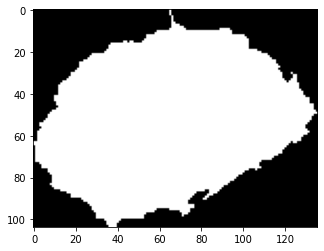

In [ ]:
# A function to measure the asymmetry 

# Measure the height and width of the skin lesions masks that are rotated --> 
# done by taking max of col and rows and halving.  

white_mask = np.where(height_mask == 1)
max_x, min_x = max(white_mask[0]), min(white_mask[0])
max_y, min_y = max(white_mask[1]), min(white_mask[1])

height_mask = height_mask[min_x:max_x + 1, min_y:max_y +1]
plt.imshow(height_mask, cmap="gray")

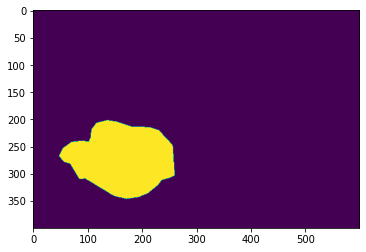

In [ ]:
# padding the mask before rotating it 0007344

newmask=plt.imread("resized_data/example_segmentation_resized/ISIC_0007344_segmentation.png")
plt.imshow(newmask)




(650, 850)

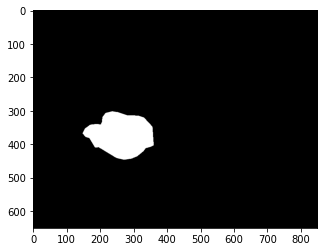

In [ ]:
shape = newmask.shape
width_add, height_add = int(shape[0]*0.25), int(shape[1]*0.25)
newmask1 = np.pad(newmask, (width_add,height_add), constant_values=(0,0))
plt.imshow(newmask1, cmap='gray')
newmask1.shape

In [ ]:
# A function to rank assymetry of skin lesions. 
"""
General idea. 
We split the matrix first in half by the width. Meaning divide no. columns by 2
and split the matrix vertically at int(no. columns/2)
We flip one part vertically and add the two matrices together. Where the pixel is
0 ignore, where the pixel is 1 is the non-overlapping asymmetrical part, 
and two are the overlapping symmetrical parts.

Now with the same procedure, we do that for the horizontal symmetric.
Divide no. rows with 2 and split the matrix horizontally. 
"""

'\nGeneral idea. \nWe split the matrix first in half by the width. Meaning divide no. columns by 2\nand split the matrix vertically at int(no. columns/2)\nWe flip one part vertically and add the two matrices together. Where the pixel is\n0 ignore, where the pixel is 1 is the non-overlapping asymmetrical part, \nand two are the overlapping symmetrical parts.\n\nNow with the same procedure, we do that for the horizontal symmetric.\nDivide no. rows with 2 and split the matrix horizontally. \n'

In [ ]:
from rotate import degrees_to_rotate
from skimage.filters import gaussian
# test rotated_data/example_segmentation_rotated/ISIC_0015401_segmentation.png
# testim = plt.imread('rotated_data/example_segmentation_resized_rotated/ISIC_0003462_segmentation.png')
testim = plt.imread('rotated_data/example_segmentation_resized_rotated/ISIC_0015401_segmentation.png')
testim[testim > 0.1] = 1
testim[testim <= 0.1] = 0

split_h, split_v = testim.shape[0]//2, testim.shape[1]//2


print(testim.shape, split_h, split_v)


# skricv if statement hvis lige ikke plus en hvis ulige gør
# testim.shape[1]%2 lægger 1 til, hvis ulige og ellers ikke, har samme funktion som et if statement ville
left_side = testim[:,:split_v]
right_side = testim[:,split_v + testim.shape[1]%2:]
 # flip the right side vertically 
right_side = np.flip(right_side,1)

# add the left side with the flipped right side and compute non-overlapping area 
# (count the 1's)

total_area = np.sum(testim[testim == 1])

#folded_image = right_side + left_side 


np.unique(testim)
summed_img = left_side + right_side
print(np.sum(summed_img[summed_img == 1]) * 2 / total_area)

FileNotFoundError: [Errno 2] No such file or directory: 'rotated_data/example_segmentation_resized_rotated/ISIC_0015401_segmentation.png'

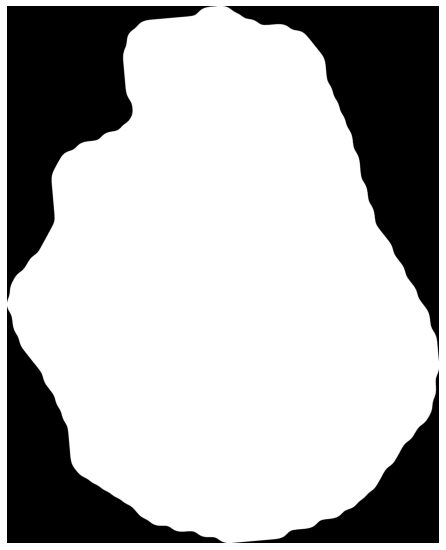

In [ ]:
# testim = plt.imread('resized_data/example_segmentation_resized/ISIC_0015401_segmentation.png')
# for i in range(3):
#     testim = gaussian(testim, sigma=(3,3))
# testim[testim > 0.1] = 1
# testim[testim <= 0.1] = 0
testim = plt.imread('fullsize_segmentation/ISIC_0015401_segmentation.png')
sigma = min(testim.shape) * 0.004
for i in range(3):
    testim = gaussian(testim, sigma=(sigma, sigma))
testim[testim > 0.1] = 1
testim[testim <= 0.1] = 0
testim = degrees_to_rotate(testim)
testim[testim > 0.1] = 1
testim[testim <= 0.1] = 0
fig = plt.figure(figsize=(6, 10))
ax = fig.add_axes((0,0,1,1))
ax.imshow(testim, cmap="gray")
ax.axis("off");

In [ ]:
testim = plt.imread('fullsize_segmentation/ISIC_0015401_segmentation.png')
testim.shape

(4419, 6648)

Vertical asymmetry score:  1.0839869987566915
Horizontal asymmetry score:  0.8919145105533645


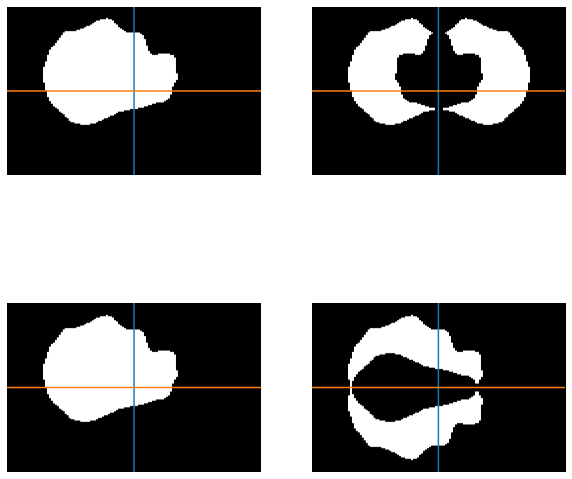

In [ ]:
# Trying with a circle (should have value of ~0)
xx, yy = np.mgrid[:600, :600]
# circle = (xx - 300) ** 2 + (yy - 300) ** 2
# testim = (circle < 300**2).astype(int)

# Artificial asymmetric image
# testim = plt.imread("asymmetric.png")[:,:,0]
# testim = 1 - testim
# testim = degrees_to_rotate(testim)

vdiff_img = testim + np.flip(testim,1)
print("Vertical asymmetry score: ", np.sum(vdiff_img == 1)/np.sum(testim))
vdiff_img[vdiff_img != 1] = 0
hdiff_img = testim + np.flip(testim,0)
print("Horizontal asymmetry score: ", np.sum(hdiff_img == 1)/np.sum(testim))
hdiff_img[hdiff_img != 1] = 0
fig, axes = plt.subplots(2,2, figsize=(10, 10))
axes[0,0].imshow(testim, cmap="gray")
axes[0,1].imshow(vdiff_img, cmap="gray")
axes[1,0].imshow(testim, cmap="gray")
axes[1,1].imshow(hdiff_img, cmap="gray")
y_max = testim.shape[0]
x_mid = testim.shape[1]//2
x_max = testim.shape[1]
y_mid = testim.shape[0]//2
for ax in axes.flatten():
    ax.axis("off")
    ax.plot([x_mid]*y_max, range(y_max))
    ax.plot(range(x_max), [y_mid]*x_max)

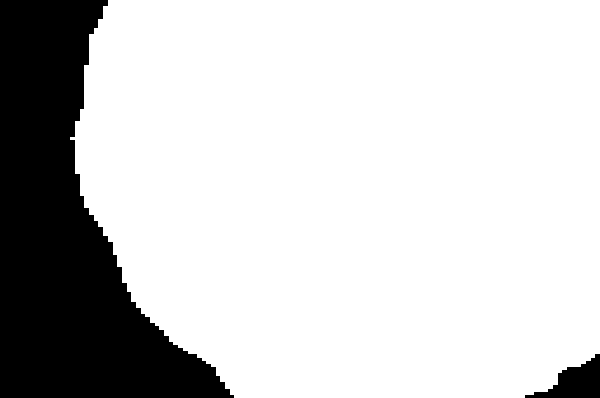

In [ ]:
seg = Image.open("resized_data/example_segmentation_resized/ISIC_0015372_segmentation.png")
seg

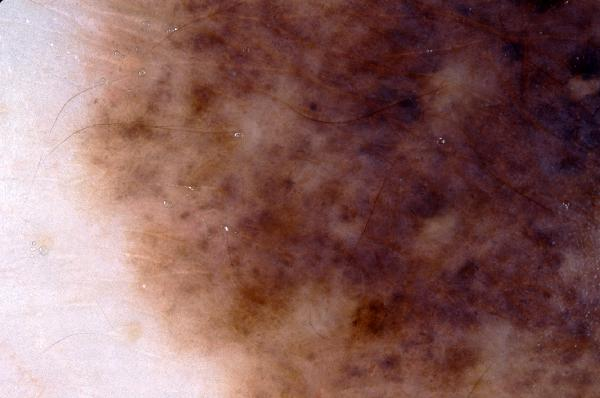

In [ ]:
Image.open("resized_data/example_image_resized/ISIC_0015372.jpg").show()

In [ ]:
from scripts.areaperimiter import measure
a, p = measure("resized_data/example_segmentation_resized/ISIC_0015372_segmentation.png")
print((4*np.pi*a)/p**2)
print(a, p)

ModuleNotFoundError: No module named 'scripts'

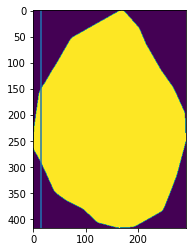

In [ ]:
image1 = plt.imread("rotated_data/example_segmentation_rotated/ISIC_0013651_segmentation.png")


plt.axvline(x=15)
plt.imshow(image1)


In [ ]:

def frame(M):
    p = 15 
    top_r = M[0:p,:]
    bottom_r = M[-p:-1,:], 
    left_c = M[p:-p,0:p], 
    right_c = M[p:-p, -p:-1]
    

def edge_percentage(M, p):
    h_p =

In [ ]:
testt = plt.imread('resized_data/example_segmentation_resized/ISIC_0014688_segmentation.png')
plt.axvline(x=15)
plt.axhline(y=15)
plt.axvline(x=575)
plt.axhline(y=375)
plt.imshow(testt, cmap = "gray")
#np.shape(testt)
#frame(testt)
#arr = frame(testt,5)
#arr

NameError: name 'plt' is not defined

In [ ]:
testt[15:-15,0:15]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>